In [50]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

games = pd.read_csv(r"C:\Users\User\Desktop\Chess Analysis\games.csv")
games.head(15)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [27]:
games['opening_name'].head(10)

0                     Slav Defense: Exchange Variation
1               Nimzowitsch Defense: Kennedy Variation
2                King's Pawn Game: Leonardis Variation
3               Queen's Pawn Game: Zukertort Variation
4                                     Philidor Defense
5                 Sicilian Defense: Mongoose Variation
6           Blackmar-Diemer Gambit: Pietrowsky Defense
7    Nimzowitsch Defense: Kennedy Variation |  Link...
8                Italian Game: Schilling-Kostic Gambit
9        Scandinavian Defense: Mieses-Kotroc Variation
Name: opening_name, dtype: object

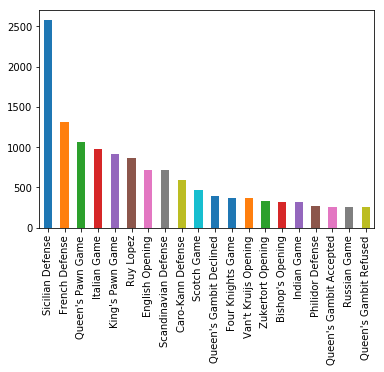

In [20]:
opening_number = games['opening_name'].map(lambda n: n.split("|")[0].split(":")[0]).value_counts().head(20)
opening_number.plot.bar()

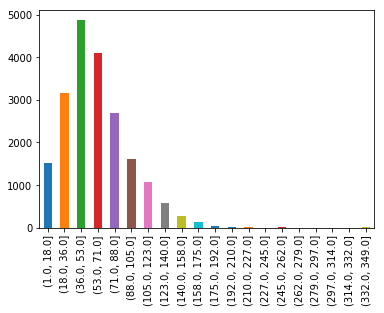

In [4]:
pd.cut(games['turns'], 20, precision=0).value_counts().sort_index().plot.bar()

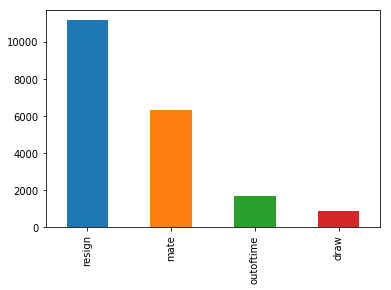

In [18]:
games['victory_status'].value_counts().plot.bar()

In [19]:
games['turns'].median(), games['turns'].mean()

(55.0, 60.46599860404826)

In [32]:
games['turns'].describe()

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

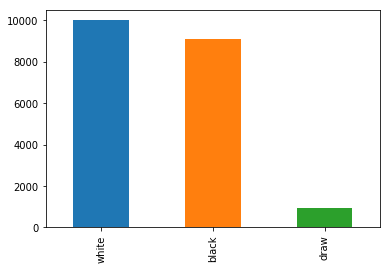

In [33]:
games['winner'].value_counts().plot.bar()

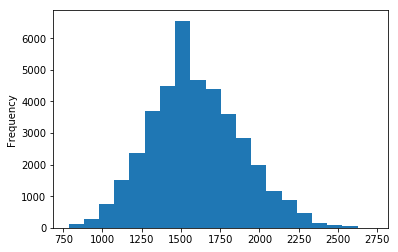

In [34]:
pd.concat([games['white_rating'], games['black_rating']]).plot.hist(20)

In [80]:
even_games = (games['white_rating'] - games['black_rating'] == 0) | (games['black_rating'] - games['white_rating'] == 0)
evengames_data = games[even_games]
evengames_data
even_games_winner = evengames_data['winner']== 'white'
evenwhitewinner = evengames_data[even_games_winner]
evenwhitewinner.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
97,nBfSissu,False,1.503970e+12,1.503970e+12,14,resign,white,45+0,lotfibma,1500,hollyandclaws,1500,e4 e5 Bc4 Nc6 d3 Nf6 Nf3 Bc5 Ng5 d6 Nxf7 Qe7 N...,C50,Italian Game: Giuoco Pianissimo | Normal,8
144,p7a4FGwp,True,1.503090e+12,1.503090e+12,30,resign,white,15+15,fastandbulbous420,1227,sassou,1227,e4 Nf6 Nc3 e5 Bc4 Bc5 Nf3 Nc6 Ng5 O-O Bxf7+ Rx...,C50,Four Knights Game: Italian Variation,8
153,GT8TdRlm,True,1.503050e+12,1.503050e+12,85,mate,white,15+15,sassou,1212,shazzam9999,1212,e4 g6 d4 h5 Bc4 e6 Bf4 d5 exd5 exd5 Bb3 Bb4+ c...,B06,Modern Defense,2
156,xwl41jna,True,1.503950e+12,1.503950e+12,65,outoftime,white,7+2,isachess,1852,roshan_ie,1852,e4 c5 Nf3 Nc6 Bb5 a6 Be2 d6 O-O Nf6 Nc3 e5 Re1...,B30,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,5
385,VC0euQZC,True,1.502050e+12,1.502050e+12,41,resign,white,10+0,sergeares,1337,rustam9,1337,e4 e5 Nf3 Be7 Nc3 Nf6 d4 d5 Bg5 dxe4 Bxf6 Bxf6...,C40,King's Knight Opening,3


In [107]:
evengames_data['winner'].value_counts()

black    95
white    95
draw     13
Name: winner, dtype: int64

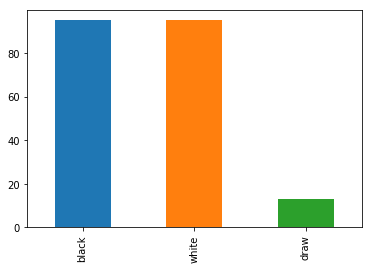

In [108]:
evengames_data['winner'].value_counts().plot.bar()

In [82]:
evengames_data['white_rating'].mean()

1522.039408866995

In [84]:
evengames_data['white_rating'].max()

2228

In [103]:
check = evengames_data['white_rating'] == 2228
evengames_data[check]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
18992,LABc7BKr,True,1.504428e+12,1.504430e+12,77,resign,white,15+5,chessmageddon,2228,conwycastle,2228,e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be2 Bd7 O-O c...,C02,French Defense: Advance Variation | Paulsen A...,9


### Scicilian still seems to be the most common opening for black

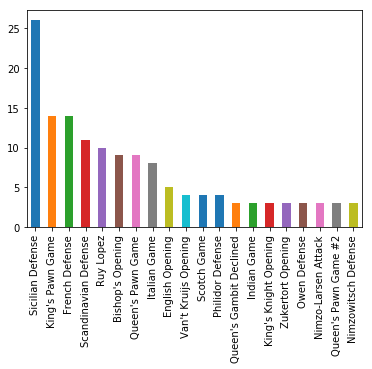

In [109]:
opening_number1 = evengames_data['opening_name'].map(lambda n: n.split("|")[0].split(":")[0]).value_counts().head(20)
opening_number1.plot.bar()

### We can now see that when games are evenly matched, that the number of moves per game goes up.

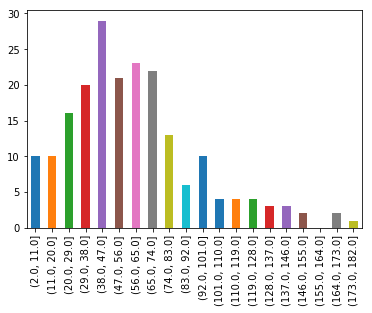

In [110]:
pd.cut(evengames_data['turns'], 20, precision=0).value_counts().sort_index().plot.bar()

### This is still consistent with the previous data

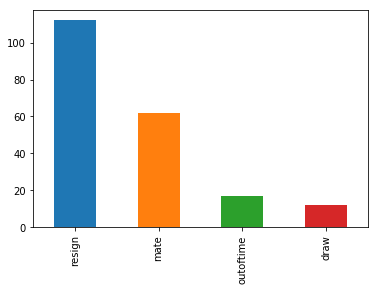

In [114]:
evengames_data['victory_status'].value_counts().plot.bar()